# COVID-19, Public Safety Measures, and Public and Fiscal Health in G20 Countries

DATA 604 (L02): Working with Data at Scale

Authors: 
- [Rodrigo Rosales Alvarez](https://www.linkedin.com/in/rodrigorosalesalvarez/)
- [Paul Croome](https://www.linkedin.com/in/pjcroome/)
- [Ann Siddiqui](https://www.linkedin.com/in/ann-siddiqui/)
- [Joshua Olea](https://www.linkedin.com/in/joshua-olea-6441a4137/)
- [Kane Smith](https://www.linkedin.com/in/kane-s/)

Professor: Dr. Katie Ovens <br>
University of Calgary <br>
December 13th, 2022

# Table of Contents
1. [Introduction](#introduction)
2. [Guiding Questions](#guiding-questions)
3. [Indiviudal Datasets](#ind-data)
4. [Packages](#packages)
5. [Data Load](#data-load)
6. [Data Cleaning](#data-cleaning)
7. [Feature Engineering](#create-columns) 
8. [Analysis](#analysis)
    1. [Question 1: How did COVID-19 impact the performance of the financial markets in G20 countries?](#q-1)
    2. [Question 2: Did government and societal healthcare actions influence the prevalence and severity of COVID-19 in G20 countries?](#q-2)
    3. [Question 3: Which factors of a country's population are most related to the severity and prevalence of COVID-19?](#q-3)
10. [Conclusion](#conclusion)
11. [References](#references)

### Introduction <a name="introduction"></a>
## Introduction <a name="introduction"></a>
The domain of our project covers both economic and healthcare-related indicators of the wellbeing of G20 countries during the coronavirus disease 2019 (COVID-19) pandemic. In particular, we will be examining data related to the prevalence and severity of the COVID-19 pandemic, the governmental and societal measures taken to reduce the spread of the disease, and the performance of key stock market indices during the pandemic. These data were all daily reported between January 2020 and October 2022.

This is an interesting and important topic of study because, in our increasingly interconnected world, contagious diseases can be transmitted over vast distances remarkably easily. Even small, remote outbreaks of diseases anywhere in the world can swiftly turn into a global pandemic, which can then cause devastation on personal, societal, and worldwide scales. 

For this reason, we will investigate questions which seek to quantify the effects of a pandemic on both public and economic health, determine healthcare measures which are effective in curbing the effects of a pandemic on public health, and identify whether a country’s healthcare measures for handling a pandemic are additionally are related to the performance of their financial markets. 

## Guiding Questions <a name="guiding-questions"></a>
1. How did COVID-19 impact the performance of the financial markets in G20 countries? 
    - What is the relationship between the prevalence and severity of COVID-19 (i.e., new COVID-19 cases, hospitalizations, ICU admissions, and deaths) in a country and the performance of that country’s strongest stock exchange index?
<br> <br>
2. Did government and societal healthcare actions influence the prevalence and severity of COVID-19 in G20 countries? 
    - Is there a correlation between vaccination, booster-shot, and policy response rates and the prevalence and severity of COVID-19 in the G20 countries?
<br> <br>  
3. Which factors of a country's population are most related to the severity and prevalence of COVID-19?

### Individual Datasets <a name="ind-data"></a>
The first dataset we will use consists of diverse information related to the COVID-19 pandemic, including a country’s daily rates of COVID-19 diagnoses, hospitalizations, deaths, vaccinations, and booster shots. We will use features of these data to determine the prevalence and severity of the COVID-19 pandemic for each of the G20 countries on each day between January 1, 2020 and October 26, 2022. We chose to examine the G20 countries for this project because we believe this subset of countries will have reliably reported data. In addition, by focusing our investigative scope, we will be able to more deeply explore the data. This dataset is contained in a CSV file and is licensed for open access under the Creative Commons BY license. The data set was put together by [Our World in Data](https://ourworldindata.org/coronavirus). 

The second series of datasets we used contain the market indices for the G20 countries, and are contained in CSV files. This series of open source datasets were obtained from and licensed by multiple sources such as [Yahoo Finance](https://finance.yahoo.com/), [Tradingeconomics.com](https://tradingeconomics.com/), [Investing.com](https://www.investing.com/), and [S&P Global Inc](https://www.spglobal.com/en/). Important information found in these datasets are the overall market performance of each index calculated daily. We plan to use these data to quantify the strength of each G20 country’s financial market, and to determine how the market performed with respect to the severity of the pandemic in each country.

Lastly, the third series of datasets we will use consist of the daily exchange rates for each country’s currency, which we require in order to convert each currency into its current value of USD. Thus, we will be able to analyze the performance of each country’s market index in a uniform manner. This series of open source datasets were also obtained from and licensed by sources such as Yahoo Finance, Tradingeconomics.com, Investing.com, and S&P Global Inc. These datasets are contained in CSV files.

### Packages <a name="packages"></a>

In [1]:
# Importing the Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
import math # use math operators
import sqlalchemy as sq # use of sql commands
import plotly.express as px # interactive graphs
import plotly.graph_objects as go # interactive graphs
import warnings # warnings
from plotly.subplots import make_subplots # interactive graphs

# Control the general style of the plots
sns.set_style('whitegrid')

# Ignore Warnings
warnings.filterwarnings('ignore')

### Data Load <a name="data-load"></a>

In [2]:
# Covid
covid_raw = pd.read_csv('datasets/covid/data.csv')

# Country Column
countries_dict = {'Argentina':'South America', 'Australia':'Ocenia', 'Brazil':'South America', 'Canada':'North America',
                  'China':'Asia', 'European Union':'Europe', 'France':'Europe', 'Germany':'Europe', 'India':'Asia', 'Indonesia':'Asia',
                  'Italy':'Europe', 'Japan':'Asia', 'Mexico':'North America', 'Russia':'Asia', 'Saudi Arabia':'Asia', 'South Africa':'Africa', 
                  'South Korea':'Asia', 'Turkey':'Asia', 'United Kingdom':'Europe', 'United States':'North America'}

index = {}
currency = {}
for key in countries_dict.keys():
    key_snake_case = key.lower().replace(' ', '_')
    
    index[key_snake_case] = pd.read_csv(f'datasets/index/{key_snake_case}_index.csv')
    if key_snake_case == 'united_states':
        pass
    else:
        currency[key_snake_case] = pd.read_csv(f'datasets/currency/{key_snake_case}_currency.csv')   

### Data Cleaning <a name="data-cleaning"></a>

In [3]:
# Create Covid Data Frame for G20 countries
g20_covid = covid_raw[covid_raw['location'].isin(list(countries_dict.keys()))]
g20_covid.rename({'location': 'country'}, axis=1, inplace=True)

# Cleaning the date column to have only dates and not timestamps
g20_covid['date'] = pd.to_datetime(g20_covid['date'], format="%Y/%m/%d")

# Creating a Data Frame with all dates from 2018-02-01 to 2022-10-31
df_dates = pd.DataFrame({'start_date': ['2018-02-01'], 'end_date': ['2022-10-31']})
df_dates['start_date'] = pd.to_datetime(df_dates['start_date'])
df_dates['end_date'] = pd.to_datetime(df_dates['end_date'])
df_dates['date'] = [pd.date_range(x, y) for x , y in zip(df_dates['start_date'], df_dates['end_date'])]
df_dates = df_dates.explode('date')
df_dates.drop(['start_date', 'end_date'], axis=1, inplace=True)

# Column names to snake case 
# Creating a Country column
# Changing date type 
# Merging with Data Frame dates
# Filling missing values
for key in countries_dict.keys():
    key_snake_case = key.lower().replace(' ', '_')

    index[key_snake_case].columns = index[key_snake_case].columns.str.lower()
    index[key_snake_case]['country'] = key
    index[key_snake_case]['date'] = pd.to_datetime(index[key_snake_case]['date'])
    index[key_snake_case] = df_dates.merge(index[key_snake_case][['date', 'country', 'adj_close']], how='left', on='date')
    index[key_snake_case]['index'] = index[key_snake_case]['adj_close']
    index[key_snake_case].drop('adj_close', axis=1, inplace=True)
    index[key_snake_case].sort_values(by=['date'], inplace=True)
    index[key_snake_case].ffill(inplace=True)

    if key_snake_case == 'united_states':
        pass
    else:
        currency[key_snake_case].columns = currency[key_snake_case].columns.str.lower()
        currency[key_snake_case]['country'] = key
        currency[key_snake_case]['date'] = pd.to_datetime(currency[key_snake_case]['date'])
        currency[key_snake_case] = df_dates.merge(currency[key_snake_case][['date', 'country', 'adj_close']], 
                                                  how='left', on='date')
        currency[key_snake_case]['exchange_rate'] = currency[key_snake_case]['adj_close']
        currency[key_snake_case].drop('adj_close', axis=1, inplace=True)
        currency[key_snake_case].sort_values(by=['date'], inplace=True)
        currency[key_snake_case].ffill(inplace=True)

### Feature Engineering <a name="create-columns"></a>

In [4]:
# Creating a Data Frame with all indexes and currency together
g20_index_data = index['united_states']
g20_index_data['exchange_rate'] = 1.0

for key in countries_dict.keys():
    key_snake_case = key.lower().replace(' ', '_')

    if key_snake_case == 'united_states':
        pass
    else:
        df_helper_2 = index[key_snake_case].merge(currency[key_snake_case], how='left', on=['date', 'country'])
        g20_index_data = pd.concat((g20_index_data, df_helper_2), ignore_index=True)

# Transforming all indexes in local currency to USD
g20_index_data['index_usd'] = g20_index_data['index'] / g20_index_data['exchange_rate']

# Continent Column
g20_index_data['continent'] = g20_index_data['country'].map(countries_dict)

# Creating a return and pct_change column
g20_index_data = g20_index_data.sort_values(by=['country', 'date'])
g20_index_data['return'] = 1.0
g20_index_data['pct_change'] = 1.0
for country in list(g20_index_data['country'].unique()):
    g20_index_data.loc[g20_index_data['country'] == country, 'return'] = g20_index_data.loc[g20_index_data['country'] == country, 
        'index_usd'].diff()
    g20_index_data.loc[g20_index_data['country'] == country, 'pct_change'] = g20_index_data.loc[g20_index_data['country'] == country, 
        'index_usd'].pct_change() * 100

# Creating a specific column from each part of the Date column
g20_covid['year'] = g20_covid['date'].dt.year
g20_covid['month'] = g20_covid['date'].dt.month
g20_covid['day'] = g20_covid['date'].dt.day_of_year
g20_covid['year_month'] = g20_covid['date'].dt.strftime('%Y-%m')

g20_index_data['year'] = g20_index_data['date'].dt.year
g20_index_data['month'] = g20_index_data['date'].dt.month
g20_index_data['day'] = g20_index_data['date'].dt.day_of_year
g20_index_data['year_month'] = g20_index_data['date'].dt.strftime('%Y-%m')

# Transformatioins needed for the choropleth map
index_2020 = g20_index_data.loc[(g20_index_data['date'] >= "2020-01-01") & (g20_index_data['date'] <= "2020-12-31")]
index_2020['date'] =  pd.to_datetime(index_2020['date'], infer_datetime_format=True)
index_2020["day"] = index_2020["date"].dt.day_of_year
index_2020_day =  index_2020.groupby("day",as_index=False).mean()
index_2020 = g20_index_data.loc[(g20_index_data['date'] >= "2020-01-01") & (g20_index_data['date'] <= "2020-12-31")]
index_2020['date'] =  pd.to_datetime(index_2020['date'], infer_datetime_format=True)
index_2020["week"] = index_2020["date"].dt.isocalendar().week
index_2020_week =  index_2020.groupby(["country", "week"],as_index=False).mean()

# As we only have COVID data from february of 2020 we are going to cut g20_indexes to start the data from february of 2018
g20_index_data = g20_index_data[g20_index_data['date'] >= pd.to_datetime('2018-02-01', format="%Y/%m/%d")]



## Analysis <a name="data-info"></a>

### Question 1: How did COVID-19 impact the performance of the financial markets in G20 countries?  <a name="q-1"></a>

In [5]:
fig = px.choropleth(index_2020, locations='country', locationmode = "country names", color="pct_change", 
                    range_color=(-5, 5), color_continuous_scale="YlGnBu", animation_frame="day")
fig.update_layout(title ="Daily Average of G20 Financial Markets in 2020",  margin={"r":0,"l":0,"b":0}, transition= {'duration':1})
fig.show()

The choropleth map above shows the percentage change per day for each G20 financial market in 2020. We can scroll through each day to see the volatility of each market as it responds to the news of COVID-19. The most notable period is from around day 55-78 where we see a large percent decrease and high volatility across all G20 countries.

In [6]:
fig = px.line(g20_index_data, x="date", y='index_usd', color='country', 
            title="Market Stock Indicator Worldwide", labels={"date": "Date", "index_usd": "Price ($)"})
fig.add_vline(x='2020-02-20', line_dash="dash")
fig.add_vline(x='2020-04-07', line_dash="dash")
fig.show()

In the graph above we can appreciate the historical data of the most important Stock Market Indicator for each country. There are 2 black dotted lines: the first one is at February 20th, 2020, when the stock market worldwide presented a bear movement; the second dotted line corresponds to April 7th, 2020, where there was a bull movement in the stock market worldwide. According to Forbes (Frazier, 2021) these two dates were the most significant in demonstrating the crash and rise of the stock market due to the worldwide COVID-19 pandemic. 

In [7]:
fig=px.line(index_2020_day, x="day", y="pct_change")
fig.add_vline(x=51, line_dash="dash")
fig.add_vline(x=96, line_dash="dash")
fig.update_layout(title = "Aggregated Daily Avg. % Change of G20 Financial Markets in 2020", xaxis_title="Day", yaxis_title = "% Change")
fig.show()

The above line graph, which aggregates the daily percent change for the financial markets of all G20 countries in 2020, compliments the previous line graph that is seperated by G20 country (as well as the choropleth map) by demonstrating the high volatility in markets as it responds to the news of COVID-19 around 50 days into 2020. We also see how the markets seemed to go back to pre-COVID daily trends after around 100 days into 2020.

**Conlusions:** In the graphs above, we can appreciate the historical data of the stock market indicators alongside the daily deaths and daily cases for countries in North America. Evident in these graphs is that the crash of the stock market (February 20th, 2020) occurred close to the time when the World Health Organization declared COVID-19 a global pandemic. We can also see that, despite the huge rise of deaths and cases in each country over time, the stock market did not experience drastic changes, and even reported strong numbers until January of 2022. We can conclude that COVID-19 clearly impacted the stock market worldwide, but this effect was mainly due to speculation, fear, and uncertainty among investors, rather than being due to the prevalence and severity of the pandemic over time.

#### a) What is the relationship between the prevalence and severity of COVID-19 (i.e., new COVID-19 cases, hospitalizations, ICU admissions, and deaths) in a country and the performance of that country’s strongest stock exchange index?

In [8]:
# Join Covid Data and Stock Market Index Data
df_covid_index = g20_index_data[g20_index_data['continent'] == 'North America'][['date', 'country', 'index_usd']].merge(
                 g20_covid[g20_covid['continent'] == 'North America'][['date', 'country', 'new_cases', 'new_deaths']],
                 how='left', on=['date', 'country'])

for country in list(df_covid_index['country'].unique()):
       fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": True}]])

       # Figure 1 = new cases
       fig.add_trace(go.Scatter(x=df_covid_index[df_covid_index['country'] == country]["date"], 
                                   y=df_covid_index[df_covid_index['country'] == country]['index_usd'], 
                                   name="Stock Market Index"),
                                   row=1, 
                                   col=1,
                                   secondary_y=False)

       fig.add_trace(go.Scatter(x=df_covid_index[df_covid_index['country'] == country]["date"], 
                                   y=df_covid_index[df_covid_index['country'] == country]['new_cases'], 
                                   name="Daily Cases"),
                                   row=1, 
                                   col=1,
                                   secondary_y=True)
       
       # Figure 2 = new deaths
       fig.add_trace(go.Scatter(x=df_covid_index[df_covid_index['country'] == country]["date"], 
                                   y=df_covid_index[df_covid_index['country'] == country]['index_usd'], 
                                   name="Stock Market Index"),
                                   row=2, 
                                   col=1,
                                   secondary_y=False)

       fig.add_trace(go.Scatter(x=df_covid_index[df_covid_index['country'] == country]["date"], 
                                   y=df_covid_index[df_covid_index['country'] == country]['new_deaths'], 
                                   name="Daily Deaths"),
                                   row=2, 
                                   col=1,
                                   secondary_y=True)
       
       fig.update_layout(title_text=str(country)+"´s Stock Market Indicator vs Daily Covid-19 Cases and Deaths")
       fig.update_yaxes(title_text="Index ($)", secondary_y=False)
       fig.update_yaxes(title_text="Cases", secondary_y=True, row=1, col=1)
       fig.update_yaxes(title_text="Deaths", secondary_y=True, row=2, col=1)
       fig.add_vline(x='2020-02-20', line_dash="dash")
       fig.add_vline(x='2020-04-07', line_dash="dash")
       fig.show()

#### Conclusions Question 1
In our graph below we can appreciate the historical data of the Stock Market Indicators alongside the daily deaths and daily cases for countries in North America, as we can see the crash of the stock market (February 20th, 2020) was close to when the World Health Organization declared Covid-19 a worldwide Pandemic and despite the huge rise of deaths and cases the stock market was not having drastic changes and even reported strong numbers until January of 2022. We can conclude that Covid-19 clearly impacted the Stock Market worldwide but it was mainly due to speculation and fear of and not due to prevalence and severity of the pandemic.  

### Question 2: Did government and societal healthcare actions influence the prevalence and severity of COVID-19 in G20 countries? <a name="q-2"></a>

In [9]:
aggregate_table = g20_covid.groupby(['continent','country']).mean().reset_index()

# Plotting interactive bar graphs using Plotly:
for var in ['new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_vaccinations_smoothed_per_million', 'stringency_index']:
    fig = px.bar(aggregate_table, x='country', y=var, color='continent')
    if var == 'new_cases_smoothed_per_million':
        fig.update_layout(title_text='Avg. Daily COVID-19 Cases Per Million People in G20 Countries', yaxis_title = "Average Daily Cases Per Million")
    elif var == 'new_deaths_smoothed_per_million':
        fig.update_layout(title_text='Avg. Daily COVID-19 Deaths Per Million People in G20 Countries', yaxis_title = "Average Daily Deaths Per Million")
    elif var == 'new_deaths_smoothed_per_million':
        fig.update_layout(title_text='Avg. Daily COVID-19 Vaccinations Per Million People in G20 Countries', 
                          yaxis_title = "Average Daily Vaccinations Per Million")
    else:
        fig.update_layout(title_text='Avg. Daily Stringency Index in G20 Countries', yaxis_title = "Average Daily Government Response Rating (0-100)")
    fig.show()

From the bar graphs above, it is clear that there were significant disparities in the average daily COVID-19 cases, deaths, and vaccinations (per million people) observed in each country over the timeframe of the dataset. In terms of the stringency of government policies, there was less variation between countries and continents, with most countries in the dataset having an average daily stringency index between 40/100 and 60/100.

The "Average Daily COVID-19 Deaths Per Million People" bar graph presents an overview of the death counts from COVID-19 in each country and continent in the G20. From this graph, one can see that the country which experienced the most deaths (per million people) due to COVID-19 was Brazil, followed closely by the United States, United Kingdom, and Italy. When comparing continents, South America, Europe, and North America come in as the top 3 continents in regards to daily deaths due to COVID-19 per million people.

The graph of Average Daily COVID-19 Vaccinations Per Million People showed that Japan had the highest number of daily vaccinations per million, followed South Korea. In addition, one can see from the previous bar graph that both of these countries had a very low death rate, which could potentially imply a negative relationship between vaccine rates and death rates. 

### Shifting Focus to North America

In order to better focus our analysis in this second guiding question, the team decided to investigate only the countries in North America -- Canada, Mexico, and the United States more deeply. To visualize the impacts of COVID-19 in each of these countries, as well as the trend of vaccinations and other government responses to the pandemic, we first used line graphs. 

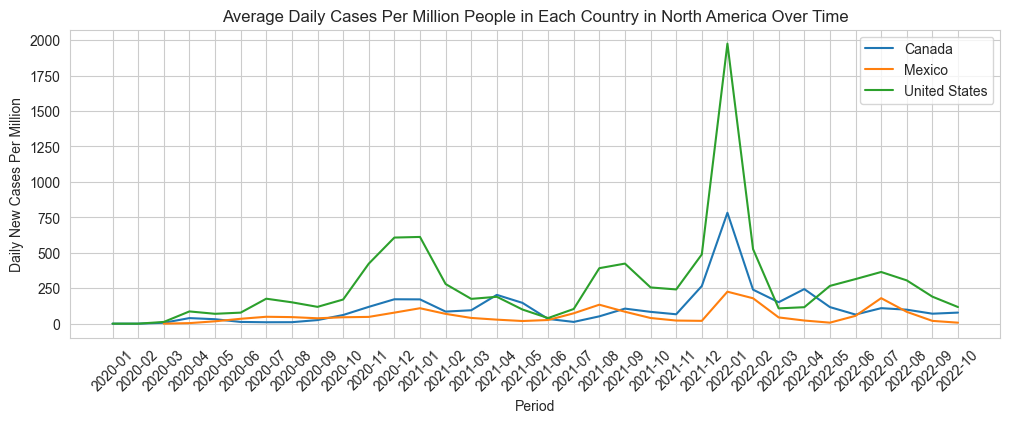

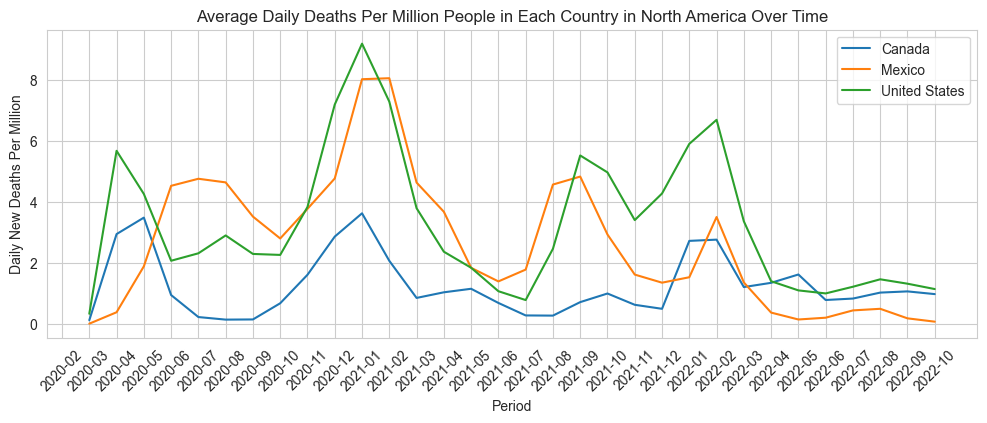

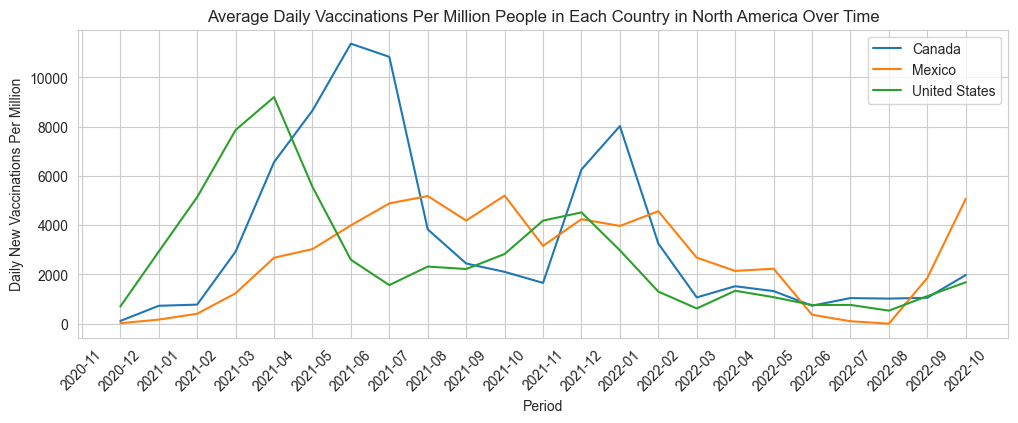

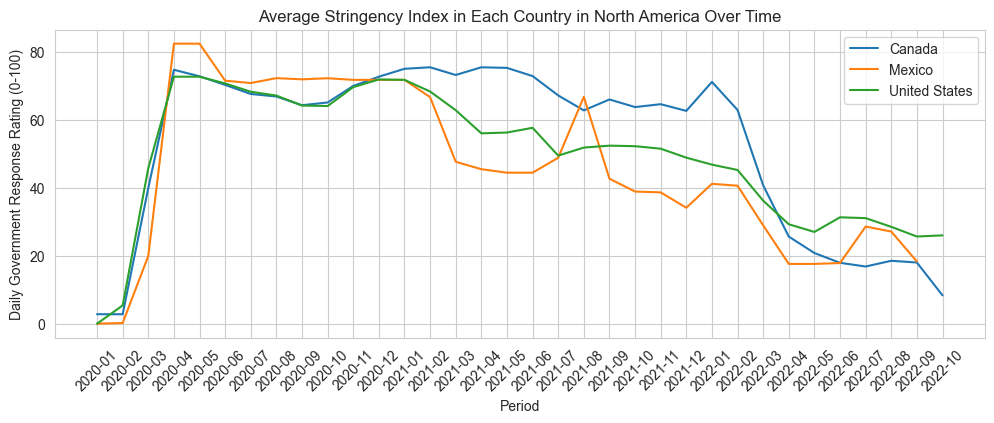

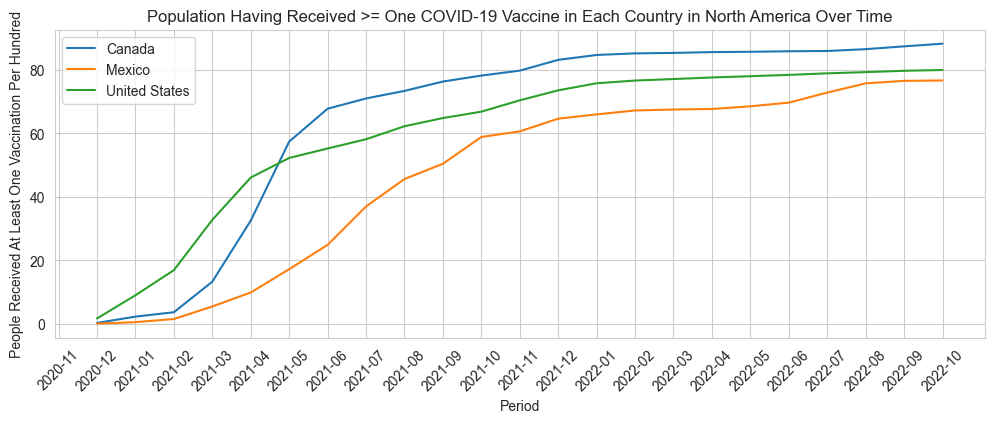

In [10]:
na_over_time = g20_covid.groupby(['continent','country', 'year_month']).mean().reset_index()
na_over_time_2 = g20_covid.groupby(['continent','country', 'year_month']).max().reset_index()

for var in ['new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_vaccinations_smoothed_per_million', 'stringency_index']:
    fig = plt.figure()
    fig.set_size_inches(12,4)
    p = sns.lineplot(x='year_month', y=var, hue='country', data=na_over_time[na_over_time['continent'] == 'North America'])
    plt.xlabel('Period')
    if var == 'new_cases_smoothed_per_million':
       plt.ylabel('Daily New Cases Per Million')
       plt.title('Average Daily Cases Per Million People in Each Country in North America Over Time')
    elif var == 'new_deaths_smoothed_per_million':
        plt.ylabel('Daily New Deaths Per Million')
        plt.title('Average Daily Deaths Per Million People in Each Country in North America Over Time')
    elif var == 'new_vaccinations_smoothed_per_million':
        plt.ylabel('Daily New Vaccinations Per Million')
        plt.title('Average Daily Vaccinations Per Million People in Each Country in North America Over Time')
    else:
        plt.ylabel('Daily Government Response Rating (0-100)')
        plt.title('Average Stringency Index in Each Country in North America Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


# Line-plot of percentage of population to have received at least one COVID-19 vaccinations
# over time for countries in North America:
fig = plt.figure()
fig.set_size_inches(12,4)
p = sns.lineplot(x='year_month', y='people_vaccinated_per_hundred', hue='country', data=na_over_time_2[na_over_time_2['continent'] == 'North America'])
plt.title('Population Having Received >= One COVID-19 Vaccine in Each Country in North America Over Time')
plt.xlabel('Period')
plt.ylabel('People Received At Least One Vaccination Per Hundred')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The Average Daily Cases Per Million People graph above shows that the trends of the average daily cases per million people followed a similar pattern in each country in North America, though the heights of each country's peaks clearly differ in degree. It is possible that some of the difference between the countries is due to a difference in reporting standards and/or a failure to report cases. A trend of under-reporting cases is particularly likely in the case of Mexico, since the first graph suggests that their population typically experienced far fewer cases on average than experienced in either Canada or the United States, while the second graph (Average Daily Deaths Per Million People) suggests that the rate of deaths in the country was similar to that seen in the United States. 

Another interesting observation from the first two graphs above is that, while the peaks in the average daily deaths per million people in each country due to COVID-19 stayed relatively consistent throughout the timeframe of the dataset, the average daily cases per million people in Canada and the United States showed far more extreme peaks in later 2021 and early 2022. This difference in trends speaks to a potential benefit of the COVID-19 vaccinations -- although the daily rate of COVID-19 cases in each country did not decrease after their introduction, the daily rate of COVID-19 deaths was far lower after their introduction, when compared to the rates of COVID-19 cases. In other words, it appears that the COVID-19 vaccinations succeeded in reducing the lethality or severity of the COVID-19 virus, rather than its virality. 

When it comes to stringency index, it is evident from the line plot that each government enacted strict measures in their country shortly after the COVID-19 pandemic began impacting their population. Over the following three years, each government then slowly reduced the breadth and severity of their regulations, only heightening them again during months in which average daily COVID-19 cases peaked. 

### COVID-19 Variables by Country in North America
To analyze these data trends another way, we examined the trends of each of these COVID-19 related variables for each country in North America on nation-based line graphs. 

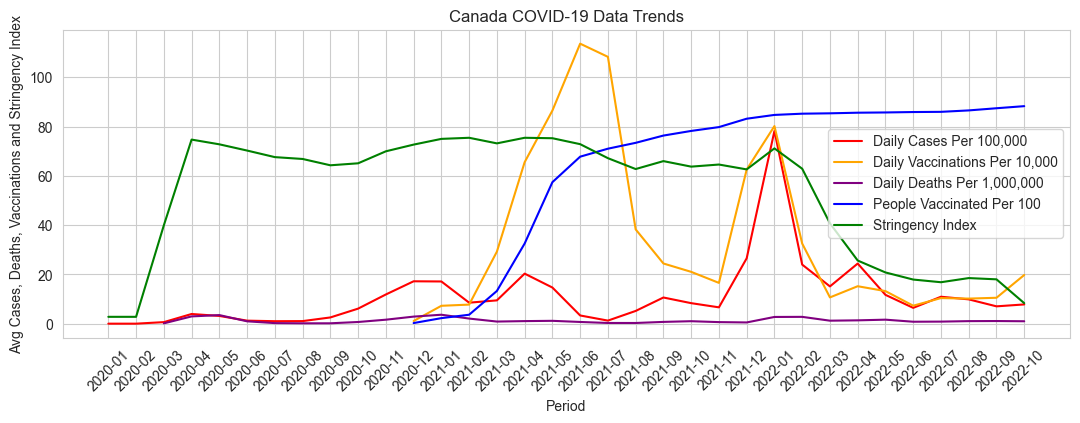

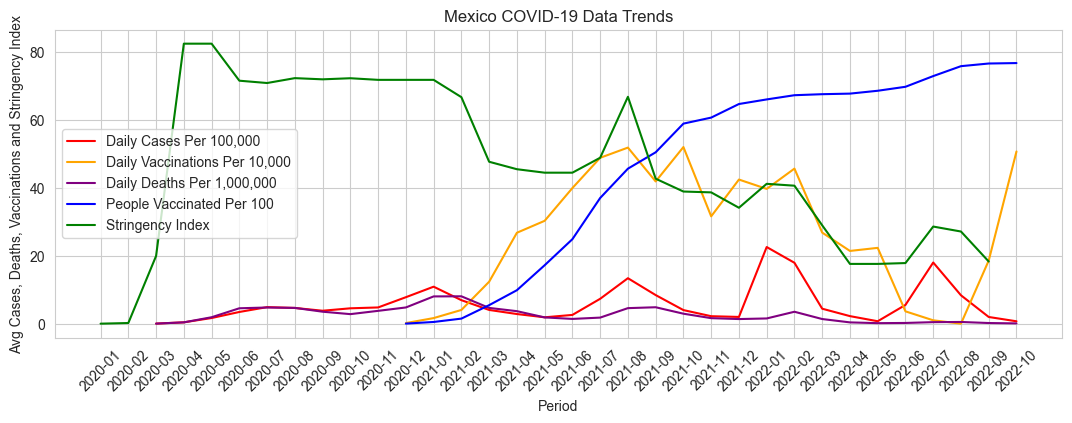

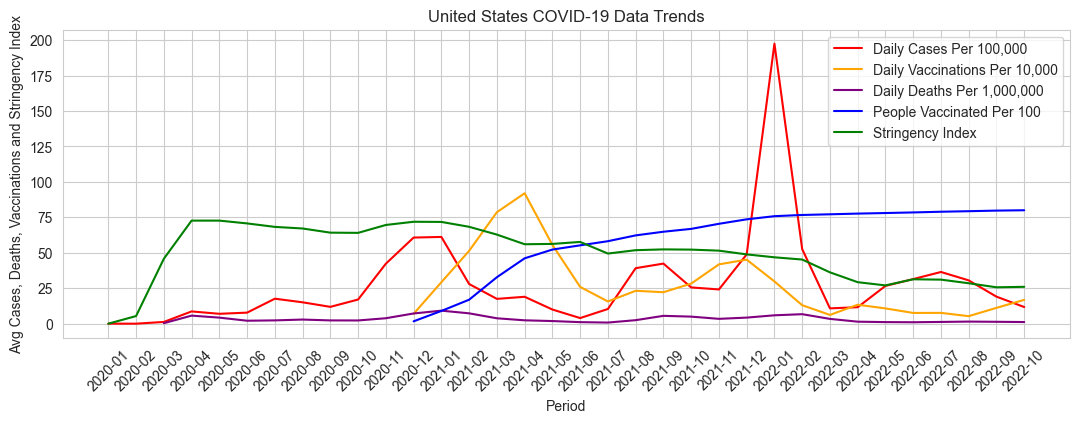

In [11]:
na_over_time['new_cases_smoothed_per_hundred_thousand'] = na_over_time['new_cases_smoothed_per_million'] / 10
na_over_time['new_vaccinations_smoothed_per_ten_tousand'] = na_over_time['new_vaccinations_smoothed_per_million'] / 100

# Line plot of all variables for each country
for country in list(na_over_time[na_over_time['continent'] == 'North America']['country'].unique()):
    fig = plt.figure()
    fig.set_size_inches(13,4)
    a = sns.lineplot(x='year_month', y='new_cases_smoothed_per_hundred_thousand', color='red', data=na_over_time[na_over_time['country'] == country], 
                    label='Daily Cases Per 100,000')
    b = sns.lineplot(x='year_month', y='new_vaccinations_smoothed_per_ten_tousand', data=na_over_time[na_over_time['country'] == country], color='orange', 
                    label='Daily Vaccinations Per 10,000')
    s = sns.lineplot(x='year_month', y='new_deaths_smoothed_per_million', data=na_over_time[na_over_time['country'] == country], color='purple', 
                    label='Daily Deaths Per 1,000,000')
    c = sns.lineplot(x='year_month', y='people_vaccinated_per_hundred', data=na_over_time_2[na_over_time_2['country'] == country], color='blue', 
                    label='People Vaccinated Per 100')
    d = sns.lineplot(x='year_month', y='stringency_index', data=na_over_time[na_over_time['country'] == country], color='green', 
                    label='Stringency Index')
    plt.title(f'{country} COVID-19 Data Trends')
    plt.xlabel('Period')
    plt.ylabel('Avg Cases, Deaths, Vaccinations and Stringency Index')
    plt.xticks(rotation=45)
    plt.legend(loc=0)
    plt.show()

The above graphs present highly intriguing insights into the trends and relationships between the COVID-19-related variables we are most interested in for each country in North America. In general, many of these trends and relationships are quite similar between the different countries, though there are some notable exceptions. For example, the United States experienced a far greater peak of average daily COVID-19 cases per million than was experienced in either Canada or Mexico, daily vaccinations per million in Mexico followed a more stable trend than observed in Canada or the United States, and Canada had a more stable stringency index over time than was seen in either Mexico or the United States. 

### Examining Relationships Between COVID-19 Measures and The Virus' Prevalence and Severity
Next, we more directly analyzed the relationships between those variables representing measures that were taken to mitigate the impact and spread of COVID-19 (government policies [stringency_index] and vaccinations) and those variables representing the prevalence and severity of COVID-19 (COVID-19-related deaths and cases) for each country in North America. In particular, to further analyze the relationships between the stringency index and the case and death rates due to COVID-19 in each country, we used interactive line graphs (made with Plotly) containing each of these rates. We then repeated this procedure to analyze the relationships of the rate of COVID-19 vaccinations with those of COVID-19 cases and deaths. 

In [12]:
# Comparing stringency index to new COVID-19 cases and deaths in each country in NA:
for country in list(g20_covid[g20_covid['continent'] == 'North America']['country'].unique()):
    fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": True}]])
    
    # Subplot 1: new cases vs. stringency
    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_cases_smoothed_per_million'],
                                name="Daily New Cases"),
                                row=1, 
                                col=1,
                                secondary_y=False)

    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['stringency_index'], 
                                name="Stringency Index"), 
                                row=1, 
                                col=1,
                                secondary_y=True)
    
    # Subplot2: new deaths vs. stringency
    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_deaths_smoothed_per_million'], 
                                name="Daily New Deaths"), 
                                row=2, 
                                col=1,
                                secondary_y=False)

    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['stringency_index'], 
                                name="Stringency Index"), 
                                row=2, 
                                col=1,
                                secondary_y=True)

    fig.update_layout(title_text=str(country)+"´s Stringency Index (0-100) vs Daily New Covid-19 Cases and Deaths (Per Million)")
    fig.update_yaxes(title_text="Stringency", secondary_y=True)
    fig.update_yaxes(title_text="Cases", secondary_y=False, row=1, col=1)
    fig.update_yaxes(title_text="Deaths", secondary_y=False, row=2, col=1)
    fig.show()

Stringency levels seem to follow spikes in cases and deaths for the most part, though less prominently for the USA. This may be due to differing government policies, under-reporting, or improper reporting methods. It appears that government regulations were at least partially effective in reducing the rates of COVID-19 cases and deaths, but it is impossible to make a firm causal claim due to the nature of post-hoc data and analyses. 

In [13]:
# Comparing vaccination rate to new COVID-19 cases and deaths in each country in NA:
for country in list(g20_covid[g20_covid['continent'] == 'North America']['country'].unique()):
    
    fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": True}]])
    # Subplot 1: new cases vs. vaccinations
    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_cases_smoothed_per_million'],
                                name="Daily New Cases"),
                                row=1, 
                                col=1,
                                secondary_y=False)

    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_vaccinations_smoothed_per_million'], 
                                name="Daily Vaccinations"), 
                                row=1, 
                                col=1,
                                secondary_y=True)
    
    # Subplot2: new deaths vs. vaccinations
    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_deaths_smoothed_per_million'], 
                                name="Daily New Deaths"), 
                                row=2, 
                                col=1,
                                secondary_y=False)

    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['new_vaccinations_smoothed_per_million'], 
                                name="Daily Vaccinations"), 
                                row=2, 
                                col=1,
                                secondary_y=True)

    fig.update_layout(title_text=str(country)+"´s Daily Vaccinations vs Daily New Covid-19 Cases and Deaths (Per Million)")
    fig.update_yaxes(title_text="Vaccinations", secondary_y=True)
    fig.update_yaxes(title_text="Cases", secondary_y=False, row=1, col=1)
    fig.update_yaxes(title_text="Deaths", secondary_y=False, row=2, col=1)
    fig.show()

Daily rates of COVID-19 vaccinations, cases, and deaths seem largely unrelated in each of the countries analyzed. However, while the daily case rates experienced a late spike in each country, the same spike was not observed in daily death rates. That is, the peak in death rates remained relatively consistent before and after the arrival of the vaccines, while the peak in cases was far greater after the introduction of the vaccines. 

Therefore, in our next set of analyses, we investigated a different measure of efficacy of vaccines: we compared the percentage of the population of each country that had received at least one vacination with the daily proportion of COVID-19 deaths divided by COVID-19 cases. If the ratio of deaths:cases decreased after the arrival of the vaccinations, this would provide evidence that the COVID-19 vaccinations were effective in reducing the lethality of the virus. 

In [14]:
# Comparing percentage of population that is vaccinated to the
# percentage of daily deaths/cases from COVID-19 in each country in NA:
for country in list(g20_covid[g20_covid['continent'] == 'North America']['country'].unique()):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=((g20_covid[g20_covid['country'] == country]['new_deaths_smoothed_per_million']) / g20_covid[g20_covid['country'] == country]['new_cases_smoothed_per_million']), name="New Deaths/Cases"), secondary_y=False)

    fig.add_trace(go.Scatter(x=g20_covid[g20_covid['country'] == country]["date"], 
                                y=g20_covid[g20_covid['country'] == country]['people_vaccinated_per_hundred'], name="% of Population Vaccinated"), secondary_y=True)

    fig.update_layout(title_text=str(country)+"´s % of People Vaccinated vs Daily Covid-19 Deaths/Cases")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Daily Deaths/Cases", secondary_y=False)
    fig.update_yaxes(title_text="% of Pop. Vaccinated", secondary_y=True)
    fig.show()

The graphs above demonstrate that, for each country in North America, the proportion of 'New Deaths/Cases' dropped significantly as the percentage of the population which had received at least one vaccination rose. This heavily implies that COVID-19 vaccines were at least partially effective in reducing the lethality of COVID-19 and thereby preventing deaths from the virus. In sum, these graphs demonstrate the following: as more new individuals received a COVID-19 vaccination, the likelihood of an individual dying after testing positive for COVID-19 fell.

#### a) Is there a correlation between vaccination, booster-shot, and policy response rates and the prevalence and severity of COVID-19 in the G20 countries?

To answer this portion of our second guiding question, we used correlation heatmaps to compare the relationships of our most important variables with one another for each country in North America, separating these by year. This analysis would also allow us to determine how the relationships between these variables changed over time, which could provide some evidence toward claiming whether a certain measure was effective at lessening the impact of the COVID-19 pandemic on a population. 

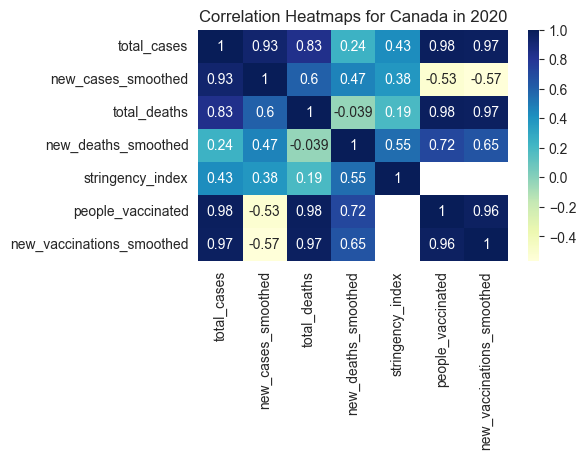

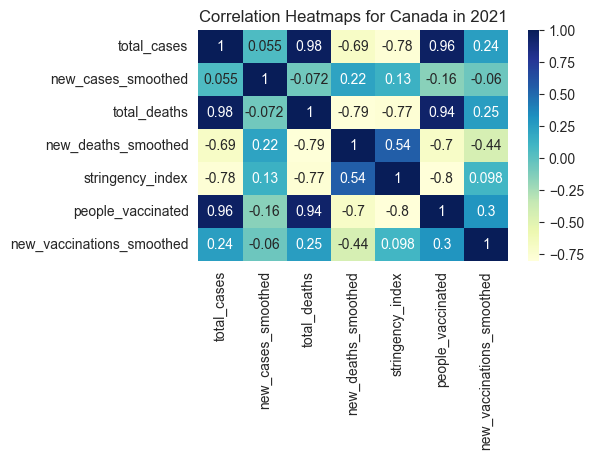

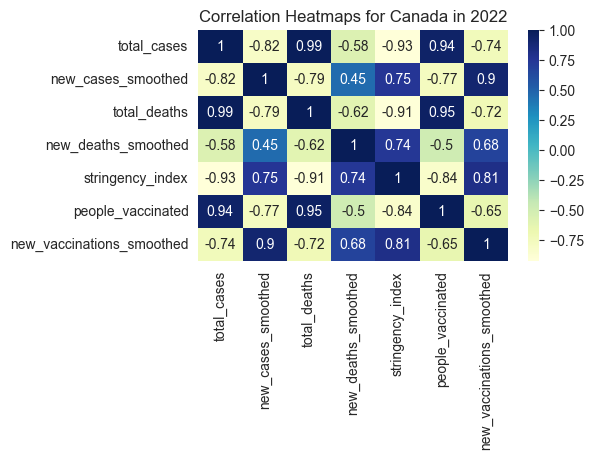

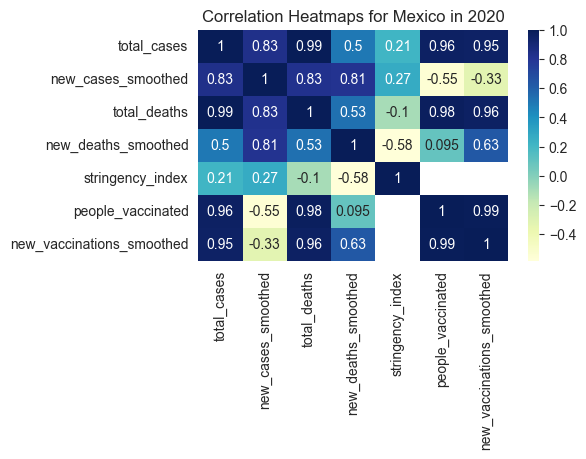

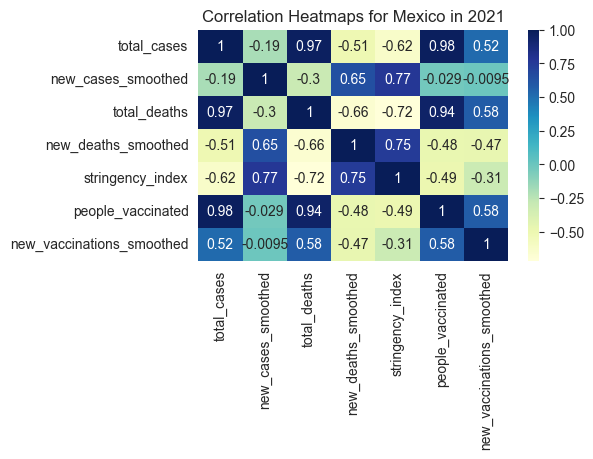

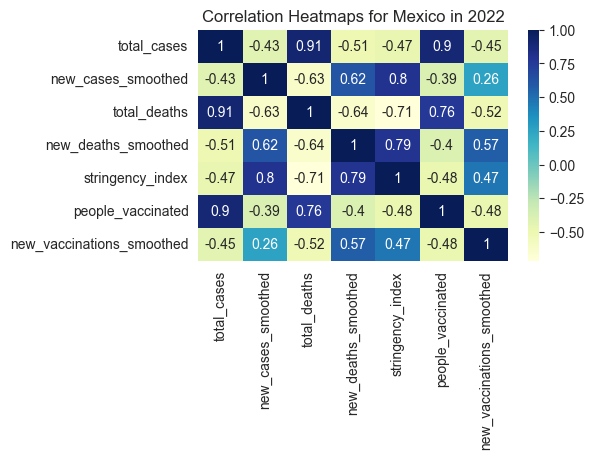

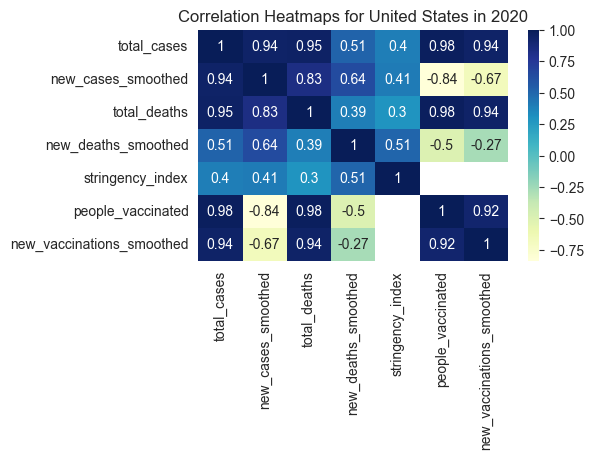

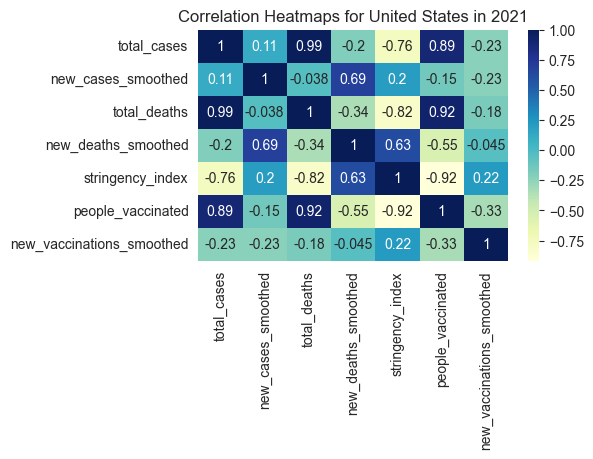

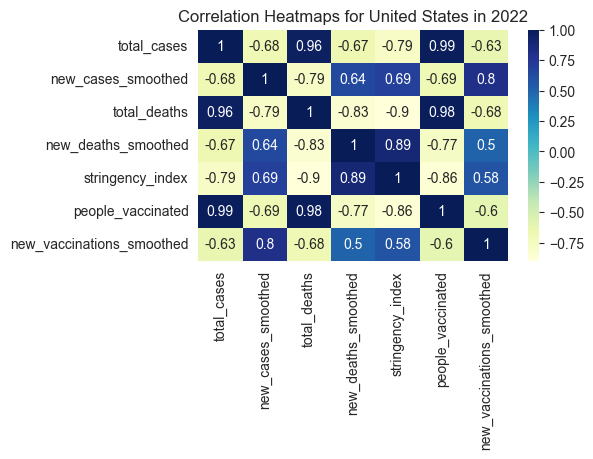

In [15]:
# Creating correlation heatmaps for each country in North America, separated 
# by year in order to see the changing relationships of our key variables
lst = ['total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'stringency_index', 'people_vaccinated', 'new_vaccinations_smoothed']
for country in g20_covid[g20_covid['continent'] == 'North America']['country'].unique():
    for year in g20_covid[g20_covid['continent'] == 'North America']['year'].unique():
        f, ax = plt.subplots(figsize=(5, 3))
        ax = sns.heatmap(g20_covid[(g20_covid['country'] == country) & (g20_covid['year'] == year)][lst].corr(), annot=True, cmap="YlGnBu")
        ax.set_title(f'Correlation Heatmaps for {country} in {year}')
        f.show()

As we can see in the heat maps above, for each country in North America, Stringency Index has a negative correlation with the Total Number of Cases and Deaths over time. This implies that government regulations could have been effective in preventing the spread of COVID-19, and decreasing it's severity. This is further supported by the fact that, as cases initially increased, Stringency indexes followed it, and this relationship flipped as time went on and cases decreased.

Moreover, the People Vaccinated has a negative correlation with New Deaths in 2021. However, People Vaccinated did not show a strong negative correlation with New Cases over time. This is in-line with the previous line graph visualizations. We can conclude from these trends that vaccinations did not decrease cases or deaths in an absolute sense, but did decrease the daily deaths experienced as a proportion of the daily cases (i.e., that vaccinations reduced the lethality of the COVID-19 virus). 

#### Conclusions Question 2
By way of analyzing the COVID-19 data for G20 countries, while focussing on cases, deaths, vaccination, and governmental regulations (stringency) the following conclusions have been drawn:

**Stringency Index As Measure To Handle COVID-19** <br>
From our analyses and visualizations presented in this report, it appears that government regulations (measured by the stringency index) were effective in reducing the number of cases and deaths observed in each country in North America. This implies that the lockdowns, business closures, and other enforcements that are included in the composite Stringency Index were effective to reduce the spread of COVID-19 (thereby resulting in fewer COVID-19 deaths). 

**Vaccinations As Measure To Handle COVID-19** <br>
Vaccinations also appear to have been an effective measure against COVID-19. However, it does not appear that vaccinations were effective in reducing the absolute number of people developing a case of COVID-19. Instead, vaccinations were effective in reducing the rate at which people died from COVID-19 on a daily basis, especially when observed as a proportion of deaths/cases. In fact, the proportion of daily deaths per million people divided by daily cases per million people in each country in NA plumetted as the percentage of vaccinated people increased in each country. This conclusion holds true when examining the correlations between the percentage of people who were vaccinated in each country in North America and the daily deaths and daily cases observed in those countries. While daily deaths are negatively correlated with the percentage of people vaccinated, daily cases are not strongly correlated to this variable.

Note: there are important limitations to using the COVID-19 dataset for the G20 countries due to possible under-reporting and errors in reporting. Despite this, the general trends described above prevail. The team attempted to deal with this by removing specific columns mentioned towards the beginning of the Guiding Question 2 section.

### Question 3: Which factors of a country's population are most related to the severity and prevalence of COVID-19? <a name="q-3"></a>

In order to solve this question, we defined the severity of COVID-19 as the average number of daily deaths due to the virus observed in a country, and we defined the prevalance of COVID-19 as the average number of new COVID-19 cases observed in a country.

The variables in our data set that describe our population are inclusive of: number of daily vaccinations, daily number of patients in hospitals, median age, poverty rates, proportion of population who smoker, the prevalence of diabetes, raw number of the population, population density, and average life expectancy.

In solving this question, we strive to determine the correlation of all our population-metric variables with regards to each of our response variables -- the average daily cases and average daily deaths.

Our approach to solving this question is to remove the bottom 5% of countries that reported the least new cases or new death. We decided to classify only the bottom 5% of countries as outliers as we determined that it was more likely for countries to have under-reported the impact of COVID-19 in their countries than to have over-reported the impact of the pandemic.

We analyzed the correlations between our desired variables by using a correlation matrix. We used this matrix to determine which variables had the highest correlations (negative or positive) with the response variables, and then concluded that these were the variables which contributed most to (either reducing or increasing) daily COVID-19 cases or deaths within a country.

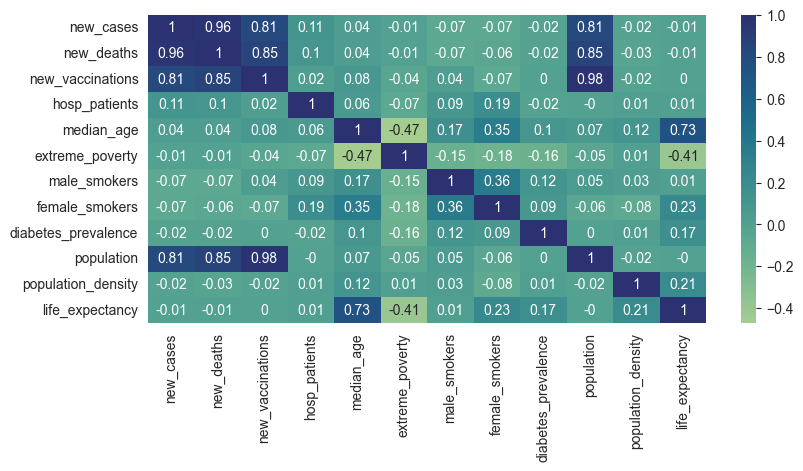

In [16]:
covid_raw.rename({'location': 'country'}, axis=1, inplace=True)
covid_raw.ffill(inplace=True)
covid_raw.bfill(inplace=True)
covid_raw.dropna(inplace=True)
covid_raw_agg = covid_raw.groupby(by=['country', 'continent']).mean().reset_index()

covid_raw_agg['rank_cases'] = covid_raw_agg['new_cases'].rank(pct=True)
covid_raw_agg['rank_deaths'] = covid_raw_agg['new_deaths'].rank(pct=True)

lst = ['new_cases', 'new_deaths', 'new_vaccinations', 'hosp_patients', 'median_age', 'extreme_poverty', 'male_smokers', 'female_smokers', 
       'diabetes_prevalence', 'population', 'population_density', 'life_expectancy']
f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(round(covid_raw_agg[(covid_raw_agg['rank_cases'] > 0.05) & (covid_raw_agg['rank_deaths'] > 0.05)][lst].corr(),2), annot=True, cmap='crest')
plt.show()

#### Conclusions Question 3
From the correlation matrix above we can conclude that our response variables are highly correlated with each other and there are subtle differences with the correlation of each of our response variables with the other variables in comparison to each other.

Although the matrix shows that vaccinations is highly positively correlated to the amount of deaths and cases a country has had, and can be interpreted as 'Vaccinations lead to an increase in Covid-19 deaths and cases'. It is most likely that the high correlation is due to a increase in Covid-19 deaths and cases have led to an increase in vaccinations due to fear of the population, and may be misleading if interpreted incorrectly.

We can therefore conclude that the factor that most likely increased the average daily new cases and average daily new deaths a country has had are the raw population numbers of that country; the more people in a country, the more deaths and cases.

We can also infer that the higher the average life expectancy and median age is for a country, the less deaths and less cases that country has had with regards to Covid-19. This could be inferred that countries with higher life expectancy possible have a 'healthier' population and were less susceptible to the virus.

All other variables seem to be correlated less than 10% to each of our response variables, we can therefore interpret that those other variables either have had no impact, or no significant impact with regards to Covid-19 cases and deaths a country has had.

### Conclusion <a name="conclusion"></a>

Through the course of this project, our team made key findings regarding the impacts of the COVID-19 pandemic and its relationships to the financial and healthcare ecosystems in G20 countries. To complete this, we used datasets which reported data daily between January 2020 and October 2022. With these data sets, we investigated 3 guiding questions aimed toward quantifying the impacts of the COVID-19 pandemic on the public and fiscal health of G20 countries and toward identifying specific measures which were effective in decreasing the impacts of the pandemic on public health.

This project entailed the usage of many datasets, including: a single dataset for COVID-19 health information, 20 datasets that include financial market indices for all G20 countries, and 19 datasets for the daily exchange rates for each G20 country’s currency to USD. As each dataset was in a CSV file format, we uploaded all of the data sets to our team’s shared database schema (l02-3) after creating empty tables for them in MySQL. For the financial datasets, we converted each country’s index into USD, then joined them onto a list spanning the dates from 2017-01-01 to 2022-10-31, employing a LEFT JOIN, in order to ensure that the final table would include every date. Then, the team then used a UNION to connect all of the index tables created for each country to make the final index table in long-form. This assisted us in creating more efficient queries and eased our subsequent creation of visualizations. The team then loaded the data, performed cleaning, and created the necessary columns to perform our analyses to answer our 3 guiding questions. 

From our analyses toward guiding question 1, we found that the initial news of COVID-19 and the speculative uncertainty surrounding it is what primarily impacted the performance of the financial markets in G20 countries. This was observed specifically between the window of February 20th, 2020 until April 7th, 2020. That is, the COVID-19-related “crash” of the stock market happened in February 2020, aligning with when the World Health Organization declared COVID-19 a global pandemic. Until April, 2020, there was a significant increase in the volatility of market returns, implying that investors were panicked and uncertain with a rapidly changing financial landscape with dramatically fluctuating prices. Following this initial crash, the financial markets did not continue to drastically change in relation to the pandemic, despite the number and rates of COVID-19 cases and deaths subsequently rising. Starting in May 2020, the financial markets essentially returned to their pre-pandemic state, which indicated that government policies geared toward handling the pandemic's impact on the public and on business may have reduced investor panic, leading to more stability in the markets. 

For guiding question 2, we found that government and societal healthcare actions did influence the prevalence and severity of COVID-19 in G20 countries. It appears that government regulations such as lockdowns, business closures, and quarantine policies (the stringency_index variable in our COVID-19 data set) proved to be effective in reducing the amount of cases and deaths observed in a country over time, particularly in North America. Further, vaccinations appeared to be effective in reducing the rate at which people died from COVID-19 on a daily basis, particularly when measured as a proportion of the amount of people dying per each new confirmed case of the virus. In sum, we found evidence that many of the most important governmental and societal policies implemented for handling the pandemic were effective in reducing the impact of COVID-19. 

Finally, for the last guiding question, we determined the factors of a country’s population that are most highly correlated with the severity and prevalence of COVID-19 by utilizing correlation matrices. We found that the higher the population of a country, the higher the number of cases and deaths from COVID-19. Moreover, we found that countries with higher average life expectancies and median ages experienced lower rates of COVID-19 cases and deaths. All other population factors considered had a correlation with COVID-19 impact measures of less than 10%, leading us to conclude that only the aforementioned population metrics had any significant bearing on the severity and prevalence of COVID-19 in countries around the world.

In conclusion, through the process of gathering the data, cleaning it, and employing SQL and Python to create queries and visualizations, the team was able to answer all three of our guiding questions. We discovered that the speculation surrounding COVID-19 (rather than the actual, tangible effects of the virus on a population) is what caused volatility in the financial markets in G20 countries. Moreover, we determined that government policies and actions exhibited some success in curbing the number of cases and deaths brought on by the pandemic (particularly in North America). Finally, we observed that countries with a higher population experienced a greater prevalence and severity of COVID-19 in terms of cases and deaths. However, countries with a higher average life expectancy and median age saw fewer cases and deaths. Ultimately, through undertaking this project, the team learned a great deal and improved on their technical skills (particularly as they pertain to SQL and Python); and, in the process, they uncovered key findings from their selected data sets to quantifiably answer the 3 guiding questions that were outlined at the outset of the project.

### References <a name="references"></a>

Chen, J. (2022). EURO STOXX 50 Index. Investopedia.	https://www.investopedia.com/terms/d/dowjoneseurostoxx50.asp <br> <br>
Department of Foreign Affairs and Trade. (2018). The G20. Australian Government Department of Foreign Affairs and Trade. https://www.dfat.gov.au/trade/organisations/g20 <br> <br>
Dow Jones Indices. (2022). S&P 500. S&P Dow Jones Indexes. https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview <br> <br>
Frazier, L. (2021). The Coronavirus Crash Of 2020, And The Investing Lesson It Taught Us. Forbes. https://www.forbes.com/sites/lizfrazierpeck/2021/02/11/the-coronavirus-crash-of-2020-and-the-investing-lesson-it-taught-us/?sh=78c9e5dd46cf <br> <br>
Hayes, A. (2022, May 27). CAC 40 Definition. Investopedia. https://www.investopedia.com/terms/c/cac40.asp <br> <br>
Investing.com. (2022a). USD/SAR - US Dollar Saudi Riyal. Investing.com. https://ca.investing.com/currencies/usd-sar-historical-data <br> <br>
Investing.com. (2022b). FTSE 100 (FTSE). Investing.com. https://www.investing.com/indices/uk-100-historical-data <br> <br>
Investing.com. (2022c). South Africa Top 40 (JTOPI). Investing.com. https://za.investing.com/indices/ftse-jse-top-40-historical-data?end_date=1666932253&st_date=1546326000 <br> <br>
Investing.com. (2022d). Tadawul All Share (TASI). Investing.com. https://www.investing.com/indices/tasi-historical-data <br> <br>
Investing.com. (2022e). USD/TRY - US Dollar Turkish Lira. Investing.com. https://www.investing.com/currencies/usd-try-historical-data <br> <br>
Investing.com. (2022f). Investing.com Italy 40 Historical Rates. Investing.com. https://ca.investing.com/indices/investing.com-italy-40-historical-data <br> <br>
Investing.com. (2022g). S&P Merval Historical Rates. Investing.com. https://ca.investing.com/indices/merv-historical-data <br> <br>
Investing.com. (2022h). S&P/ASX 200 Historical Rates. Investing.com. https://ca.investing.com/indices/aus-200-historical-data <br> <br>
Investing.com. (2022i). SZSE Composite Historical Rates. Investing.com. https://ca.investing.com/indices/szse-composite-historical-data <br> <br>
Market Index. (2014). S&P/ASX 200 - Shares Prices & Charts. Market Index. https://www.marketindex.com.au/asx200 <br> <br>
Maverick, J. B. (2022). What Are the Market Indicators for Chinese Stock Market and Economy? Investopedia. https://www.investopedia.com/ask/answers/032515/what-are-most-common-market-indicators-follow-chinese-stock-market-and-economy.asp <br> <br>
National Stock Exchange of India Limited. (2022). NIFTY 50 Live | NSE Nifty 50 Index Today - NSE India. NSE India. https://www.nseindia.com/products-services/indices-nifty50-index <br> <br>
Our World in Data. (2022). COVID-19 Data Explorer. Our World in Data. https://ourworldindata.org/explorers/coronavirus-data-explorer <br> <br>
S&P Dow Jones Indices. (2022). S&P Africa 40. S&P Dow Jones Indices. https://www.spglobal.com/spdji/en/indices/equity/sp-africa-40-index/#overview <br> <br>
Trade Economics. (2019a). Germany DAX 30 Stock Market Index | 2019 | Data | Chart | Calendar. Trading Economics. https://tradingeconomics.com/germany/stock-market <br> <br>
Trading Economics. (2019b). Canada S&P/TSX Toronto Stock Market Index | 2019 | Data | Chart | Calendar. Trading Economics. https://tradingeconomics.com/canada/stock-market <br> <br>
Trading Economics. (2022a). Saudi Arabia Stock Market (TASI). Trading Economics. https://tradingeconomics.com/saudi-arabia/stock-market <br> <br>
Trading Economics. (2022b). Turkey Stock Market. Trading Economics. https://tradingeconomics.com/turkey/stock-market <br> <br>
Trading Economics. (2022c). United Kingdom Stock Market Index (GB100). Trading Economics. https://tradingeconomics.com/united-kingdom/stock-market <br> <br>
Trading Economics. (2022d). Argentina Stock Market (MERVAL) - 2022 Data - 1991-2021 Historical - 2023 Forecast. Trading Economics. https://tradingeconomics.com/argentina/stock-market <br> <br>
Trading Economics. (2022e). Brazil Stock Market (BOVESPA) | 1988-2020 Data | 2021-2022 Forecast | Quote | Chart. Trading Economics. https://tradingeconomics.com/brazil/stock-market <br> <br>
Trading Economics. (2022f). Indonesia Stock Market (JCI) | 1990-2021 Data | 2022-2023 Forecast | Quote | Chart. Trading Economics. https://tradingeconomics.com/indonesia/stock-market <br> <br>
Trading Economics. (2022g). Italy Stock Market Index (IT40) - 2022 Data - 1997-2021 Historical - 2023 Forecast. Trading Economics. https://tradingeconomics.com/italy/stock-market <br> <br>
Yahoo Finance. (2022a). BIST 100 (XU100.IS). Yahoo Finance. https://finance.yahoo.com/quote/XU100.IS/ <br> <br>
Yahoo Finance. (2022b). CAC 40 (^FCHI) Historical Data - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/%5EFCHI/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022c). DAX PERFORMANCE-INDEX (^GDAXI) Historical Data - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/%5EGDAXI/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022d). ESTX 50 PR.EUR (^STOXX50E). Yahoo Finance.  https://finance.yahoo.com/quote/%5ESTOXX50E/history/ <br> <br>
Yahoo Finance. (2022e). IBOVESPA (^BVSP) Historical Data - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/%5EBVSP/history?period1=1577836800&period2=1666742400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true 
Yahoo Finance. (2022f). Jakarta Composite Index (^JKSE) Historical Data - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/%5EJKSE/history?period1=1509148800&period2=1667001600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022g). NIFTY 50 (^NSEI) Historical Data - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/%5ENSEI/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022h). S&P 500 (^GSPC). Yahoo Finance. https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch <br> <br>
Yahoo Finance. (2022i). S&P/TSX Composite index (^GSPTSE) Historical Data - Yahoo Finance. Ca.finance.yahoo.com. https://ca.finance.yahoo.com/quote/%5EGSPTSE/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022j). USD/ARS (ARS=X) Live Rate, Chart & News - Yahoo Finance. Ca.finance.yahoo.com. https://ca.finance.yahoo.com/quote/ARS%3DX/history?period1=1577836800&period2=1666742400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022k). USD/AUD (AUD=X) Live Rate, Chart & News - Yahoo Finance. Ca.finance.yahoo.com. https://ca.finance.yahoo.com/quote/AUD%3DX/history?period1=1577836800&period2=1666742400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022l). USD/BRL (BRL=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/BRL%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022m). USD/CAD (CAD=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/CAD%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022n). USD/CNY (CNY=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/CNY%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022o). USD/EUR (EUR=X). Yahoo Finance. https://ca.finance.yahoo.com/quote/EUR%3DX/history?period1=1509062400&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022p). USD/EUR (EUR=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/EUR%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022q). USD/GBP (USDGBP=X). Yahoo Finance.  https://finance.yahoo.com/quote/USDGBP%3DX/history?period1=1509062400&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022r). USD/IDR (IDR=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/IDR%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022s). USD/INR (INR=X) Live Rate, Chart & News - Yahoo Finance. Yahoo Finance. https://finance.yahoo.com/quote/INR%3DX/history?period1=1509148800&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true <br> <br>
Yahoo Finance. (2022t). USD/ZAR (ZAR=X). Yahoo Finance.  https://finance.yahoo.com/quote/ZAR%3DX/history?period1=1509062400&period2=1666915200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true